<a href="https://colab.research.google.com/github/Atharv24-Atreus/Pattern_Recogination-/blob/main/PatternLab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (178, 13)
Column names: ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


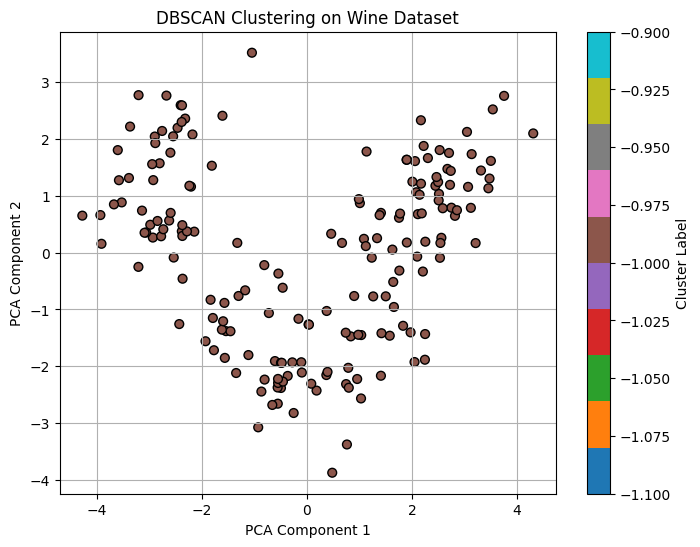

Estimated number of clusters: 0
Estimated number of noise points: 178


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv('wine-clustering.csv')

# Preview dataset
print("Data shape:", data.shape)
print("Column names:", data.columns.tolist())

# Optional: drop label column if present (assume first column is label)
if data.columns[0].lower() in ['class', 'label', 'target']:
    X = data.iloc[:, 1:]
else:
    X = data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tweak eps and min_samples
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to data
data['Cluster'] = labels

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the DBSCAN clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on Wine Dataset')
plt.grid(True)
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Summary
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")
